# Hotel Booking Demand Data Analysis


1. [Introduction](#introduction)
2. [Features Overview](#features-overview)
3. [Data Loading](#data-loading)
4. [Data Cleaning](#data-cleaning)
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
6. [Feature Engineering](#feature-engineering)


## 1. Introduction <a id='introduction'></a>

This analysis explores the Hotel Booking Demand dataset from Kaggle. Our goal is to uncover patterns and insights in hotel bookings, preparing for future predictive modeling. EDA is key in making informed decisions in the hospitality industry, and we aim to transform data into actionable insights.


## 2. Features Overview <a id='features-overview'></a>

This section provides an overview of the dataset's features. Understanding these features is essential for our analysis, as they give us clues about customer behavior and booking trends. This foundation will guide our deeper analysis in the next sections.


#### Features Table

|   | Feature                           | Short Description                                       | Data Type                |
|---|-----------------------------------|---------------------------------------------------------|--------------------------|
| 0 | hotel                             | Type of hotel (Resort Hotel or City Hotel)               | Categorical (String)     |
| 1 | is_canceled                       | Indicates if the booking was canceled (1) or not (0)    | Binary (Integer)         |
| 2 | lead_time                         | Number of days between booking and arrival               | Numeric (Integer)        |
| 3 | arrival_date_year                 | Year of arrival date                                    | Numeric (Integer)        |
| 4 | arrival_date_month                | Month of arrival date                                   | Categorical (String)     |
| 5 | arrival_date_week_number          | Week number of year for arrival date                    | Numeric (Integer)        |
| 6 | arrival_date_day_of_month         | Day of month for arrival date                           | Numeric (Integer)        |
| 7 | stays_in_weekend_nights           | Number of weekend nights the guest stayed               | Numeric (Integer)        |
| 8 | stays_in_week_nights              | Number of week nights the guest stayed                  | Numeric (Integer)        |
| 9 | adults                            | Number of adults in the booking                         | Numeric (Integer)        |
|10 | children                          | Number of children in the booking                       | Numeric (Integer)        |
|11 | babies                            | Number of babies in the booking                         | Numeric (Integer)        |
|12 | meal                              | Type of meal booked                                     | Categorical (String)     |
|13 | country                           | Country of origin of the guest                          | Categorical (String)     |
|14 | market_segment                    | Market segment designation                             | Categorical (String)     |
|15 | distribution_channel              | Booking distribution channel                            | Categorical (String)     |
|16 | is_repeated_guest                 | Indicates if the guest is a repeated guest (1) or not (0) | Binary (Integer)         |
|17 | previous_cancellations            | Number of previous booking cancellations by the guest    | Numeric (Integer)        |
|18 | previous_bookings_not_canceled    | Number of previous bookings not canceled by the guest    | Numeric (Integer)        |
|19 | reserved_room_type                | Code for the type of room reserved                       | Categorical (String)     |
|20 | assigned_room_type                | Code for the type of room assigned                       | Categorical (String)     |
|21 | booking_changes                   | Number of changes made to the booking                    | Numeric (Integer)        |
|22 | deposit_type                      | Type of deposit made for the booking                     | Categorical (String)     |
|23 | agent                             | ID of the travel agency that made the booking            | Numeric (Integer)        |
|24 | company                           | ID of the company that made the booking                  | Numeric (Integer)        |
|25 | days_in_waiting_list              | Number of days the booking was on the waiting list       | Numeric (Integer)        |
|26 | customer_type                     | Type of booking customer (Transient, Contract, etc.)     | Categorical (String)     |
|27 | adr                               | Average Daily Rate (Price)                              | Numeric (Float)          |
|28 | required_car_parking_spaces       | Number of parking spaces requested by the guest          | Numeric (Integer)        |
|29 | total_of_special_requests         | Number of special requests made by the guest             | Numeric (Integer)        |
|30 | reservation_status                | Reservation last status (Canceled, Check-Out, No-Show)   | Categorical (String)     |
|31 | reservation_status_date           | Date at which the last status was set                    | Date (YYYY-MM-DD)        |


_Table sourced from [Antonio, Nuno, Ana de Almeida, and Luis Nunes. "Hotel booking demand datasets." Data in brief 22 (2019): 41-49.r]._ 

## 3. Data Loading <a id='data-loading'></a>


In this section, we load the Hotel Booking Demand dataset. Our focus is on:
- Ensuring data integrity by loading it correctly.
- Providing a quick overview of the dataset's size and structure.
- Preparing the dataset for the next steps of cleaning and analysis.


In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interactive, widgets
from IPython.display import display

In [2]:
# Set up the visual style for plots
sns.set_palette("deep")

In [3]:
# Define the parent directory for file paths
parent_dir = Path(os.path.realpath("")).parent

# Define the directory for the dataset
dataset_dir = parent_dir / "data" / "raw"

# Define the data file path
data_file_path = dataset_dir / "hotel-booking-demand" / "hotel_bookings.csv"

In [4]:
# Read the data into a DataFrame
df = pd.read_csv(data_file_path)

In [5]:
# Expand DataFrame display
pd.options.display.max_columns = None

In [6]:
# Display the first few rows of the DataFrame
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# df.iloc[0]

In [8]:
# Get general information about the DataFrame (non-null counts, data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# Display the shape of the DataFrame
df.shape

(119390, 32)

In [10]:
df.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

## 4. Data Cleaning <a id='data-cleaning'></a>.


Data cleaning is crucial for accurate analysis. Key steps include:
- Identifying and handling missing values.
- Removing duplicates.

This process ensures our dataset is clean and analysis-ready.

### 4.1. Handle missing values

In [11]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print(f"Columns with missing values: \n{columns_with_missing_values}")

Columns with missing values: 
children         4
country        488
agent        16340
company     112593
dtype: int64


In [12]:
def display_unique_values(column):
    print(f"\nUnique Values for {column} ({df[column].nunique()} unique values):\n")
    print(df[column].unique())

# Create a dropdown for columns
dropdown_columns = widgets.Dropdown(
    options=columns_with_missing_values.index,
    description='Select Column:',
    disabled=False,
    style={'description_width': 'initial'},
    layout={'width': 'max-content'},
)

# Use interactive to create interactive plot
interactive_plot = interactive(display_unique_values, column=dropdown_columns)
display(interactive_plot)

interactive(children=(Dropdown(description='Select Column:', layout=Layout(width='max-content'), options=('chi…

In [13]:
# Handle missing values
df['children'] = df['children'].fillna(0)  # Assuming missing 'children' entries mean no children
df['country'] = df['country'].fillna("unknown_value")
df['agent'] = df['agent'].fillna(0)
df = df.drop(columns='company')  # Too many missing values in 'company'

### 4.2. Change data types

In [14]:
# float -> int
df['children'] = df['children'].astype(int)
df['agent'] = df['agent'].astype(int)

### 4.3. Handle duplicates

In [15]:
# Check for duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate entries: {num_duplicates}")

Number of duplicate entries: 32001


In [16]:
# Removing duplicate rows if any
# df.drop_duplicates(inplace=True)

## 5. Exploratory Data Analysis (EDA) <a id='exploratory-data-analysis-eda'></a>.


EDA is where we dig into the dataset to uncover trends and insights. Our goal is to gain a comprehensive understanding of the data, which can inform better decision-making in hotel management.

### 5.1. Data Summary and Overview

In [17]:
# Statistical Summary of the Data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [18]:
# Select numeric columns
numeric_columns = df.select_dtypes(include='number')

In [19]:
# Calculate skewness for numeric columns
skewness = numeric_columns.skew()

# Calculate kurtosis for each numerical column
kurtosis = numeric_columns.kurtosis()

# Combine skewness and kurtosis into a DataFrame
skew_kurt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

# Display the DataFrame
print(skew_kurt_df)

                                 Skewness     Kurtosis
is_canceled                      0.536678    -1.712005
lead_time                        1.346550     1.696449
arrival_date_year               -0.232583    -0.994564
arrival_date_week_number        -0.010014    -0.986077
arrival_date_day_of_month       -0.002000    -1.187168
stays_in_weekend_nights          1.380046     7.174066
stays_in_week_nights             2.862249    24.284555
adults                          18.317805  1352.115116
children                         4.112670    18.674464
babies                          24.646545  1633.948235
is_repeated_guest                5.326315    26.370077
previous_cancellations          24.458049   674.073693
previous_bookings_not_canceled  23.539800   767.245210
booking_changes                  6.000270    79.393605
agent                            1.300287     0.512689
days_in_waiting_list            11.944353   186.793070
adr                             10.530214  1013.189851
required_c

### 5.2. Distribution of Numeric Features

In [20]:
def plot_numeric(column, plot_type):
    plt.figure(figsize=(10, 6))

    if plot_type == 'countplot':
        sns.countplot(x=pd.Categorical(df[column]), hue='is_canceled', data=df)
    elif plot_type == 'histplot':
        sns.histplot(x=df[column], hue='is_canceled', data=df, kde=True)

    plt.title(f'Distribution of {column}')
    plt.show()

# Create a dropdown for columns
dropdown_columns = widgets.Dropdown(
    options=numeric_columns.columns,
    description='Select Column:',
    disabled=False,
    style={'description_width': 'initial'},
    layout={'width': 'max-content'},
)

# Create a dropdown for selecting plot type
dropdown_plot_type = widgets.Dropdown(
    options=['countplot', 'histplot'],
    description='Select Plot Type:',
    disabled=False,
    style={'description_width': 'initial'},
    layout={'width': 'max-content'},
)

# Use interactive to create interactive plot
interactive_plot = interactive(plot_numeric, column=dropdown_columns, plot_type=dropdown_plot_type)
display(interactive_plot)

interactive(children=(Dropdown(description='Select Column:', layout=Layout(width='max-content'), options=('is_…

### 5.3. Stacked Bar Charts for Categorical Features

In [21]:
# Select categorical columns
categorical_columns = df.select_dtypes(include='object')

In [22]:
def plot_categorical(column, top_n_countries=20):
    plt.figure(figsize=(10, 6))
    
    if column == 'country':
        # Identify the top N countries
        top_countries_list = df['country'].value_counts().nlargest(top_n_countries).index

        # Filter the DataFrame to include only the top N countries
        df_top_countries = df[df['country'].isin(top_countries_list)]

        sns.countplot(x=column, data=df_top_countries, order=top_countries_list, hue='is_canceled')
        plt.title(f'Count of Bookings by {column} (Top {top_n_countries})')
    else:
        sns.countplot(x=column, data=df, hue='is_canceled')
        plt.title(f'Count of Bookings by {column}')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Create widgets
column_dropdown = widgets.Dropdown(
    options=categorical_columns.columns,
    description='Select Column:',
    disabled=False,
    style={'description_width': 'initial'},
    layout={'width': 'max-content'},
)

top_countries_slider = widgets.IntSlider(
    value=20,
    min=1,
    max=50,
    step=1,
    description='Top Countries:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style={'description_width': 'initial'},
)

# Use interactive to create interactive plot
interactive_plot = interactive(plot_categorical, column=column_dropdown, top_n_countries=top_countries_slider)
display(interactive_plot)

interactive(children=(Dropdown(description='Select Column:', layout=Layout(width='max-content'), options=('hot…

### 5.4. Correlation Heatmap

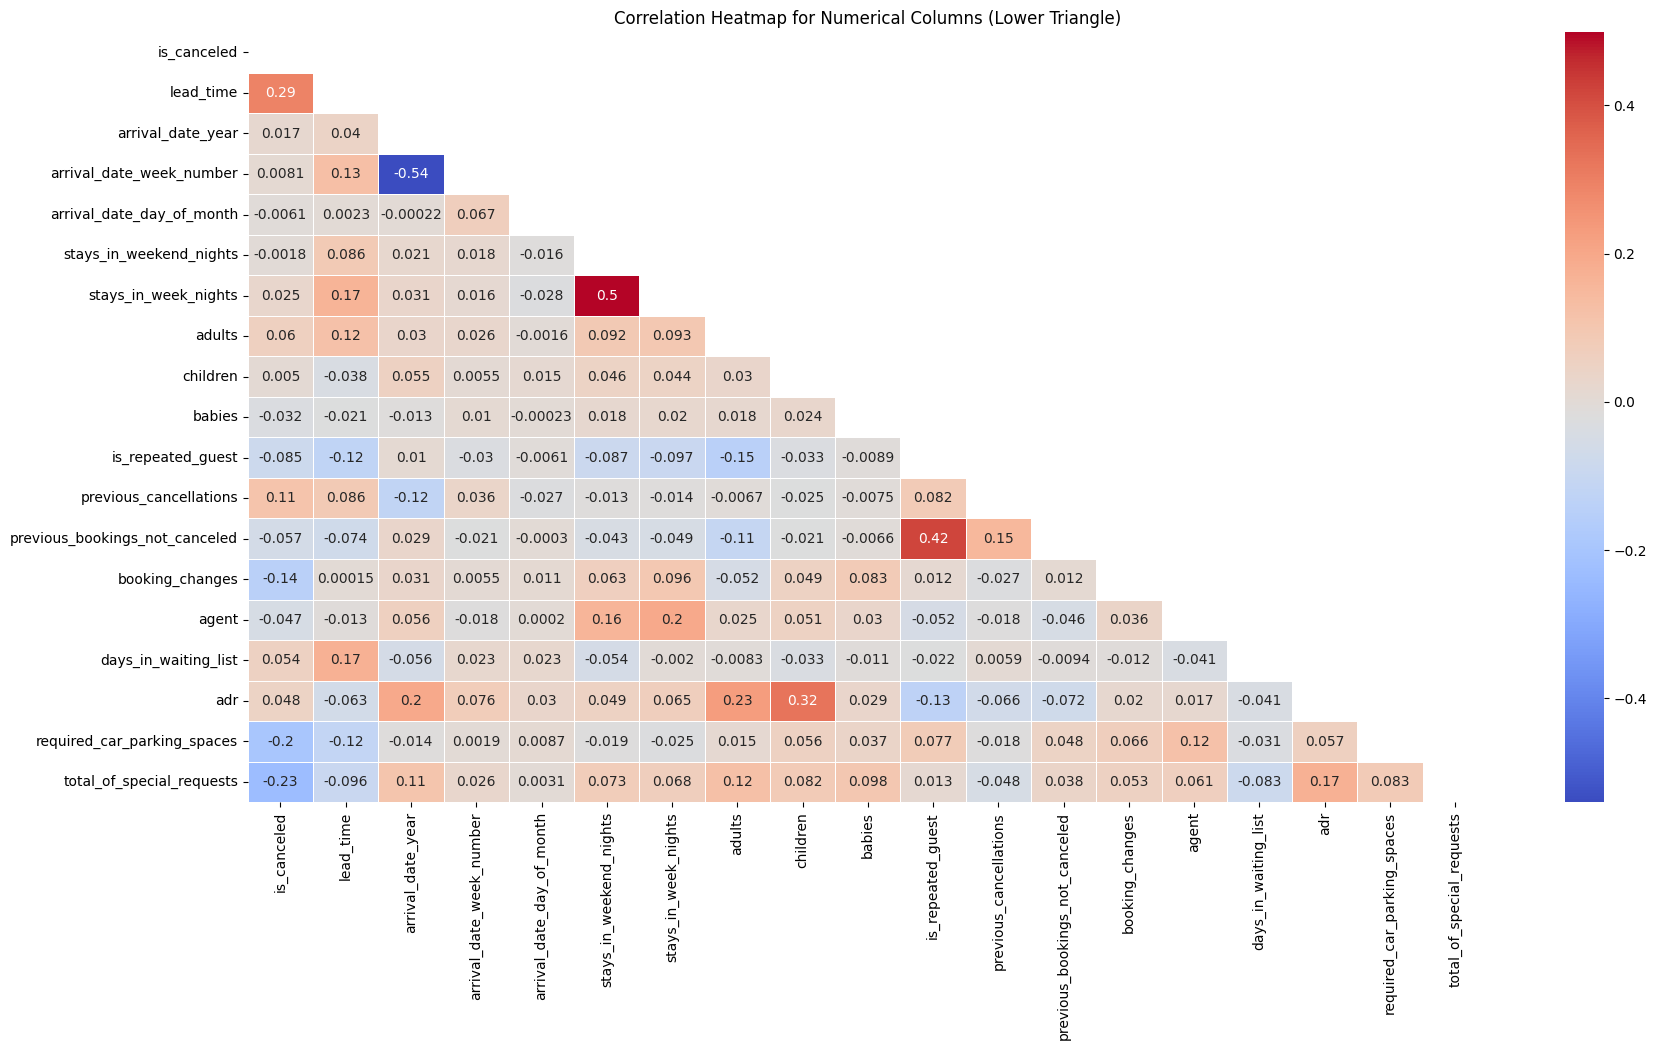

In [23]:
# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=0)

# Plot heatmap for the lower triangle of the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)
plt.title('Correlation Heatmap for Numerical Columns (Lower Triangle)')
plt.show()

### 5.5. Feature Relationships (Scatter Plots)

- Numeric columns: Scatter Plots for Highly Correlated Pairs

In [24]:
def plot_highly_correlated_pairs(threshold):
    # Select the upper triangle of the correlation matrix
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Find pairs with higher absolute correlation values
    relevant_scatter_pairs = []

    for col in upper_triangle.columns:
        highly_correlated = upper_triangle[upper_triangle[col].abs() > threshold][col].index
        relevant_scatter_pairs.extend([(col, corr_col) for corr_col in highly_correlated])

    # Remove duplicate pairs and self-correlations
    relevant_scatter_pairs = list(set(relevant_scatter_pairs) - set([(col, col) for col in numeric_columns.columns]))

    if not relevant_scatter_pairs:
        print(f"No pairs found with correlation greater than {threshold}")
        return

    # Select relevant numerical columns for pairplot
    relevant_numerical_columns = [pair[0] for pair in relevant_scatter_pairs] + [pair[1] for pair in relevant_scatter_pairs]

    # Create a DataFrame with the selected columns
    relevant_columns_df = df[relevant_numerical_columns].copy()

    # Add 'is_canceled' column for color differentiation
    relevant_columns_df['is_canceled'] = df['is_canceled']

    # Use sns.pairplot for the selected columns
    sns.pairplot(relevant_columns_df, hue='is_canceled', diag_kind='kde', plot_kws={'alpha': 0.5}, corner=True)
    plt.suptitle(f'Pairwise Scatter Plots for Highly Correlated Features (correlation > {threshold})', y=1.02)
    plt.show()

# Create a slider for the threshold
threshold_slider = widgets.FloatSlider(
    value=0.5,
    min=0,
    max=1.0,
    step=0.05,
    description='Threshold:',
    continuous_update=False,
    style={'description_width': 'initial'},
)

# Use interactive to create interactive plot
interactive_plot = interactive(plot_highly_correlated_pairs, threshold=threshold_slider)
display(interactive_plot)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Threshold:', max=1.0, step=…

### 5.6. Outlier Analysis

In [25]:
def interactive_boxplot(x, y, hue, log_scale):
    plt.figure(figsize=(10, 6))
    
    sns.boxplot(x=df[x], y=df[y], hue=df[hue], data=df, orient='v', log_scale=log_scale)

    plt.title(f'Distribution of {y} per {x}')
    plt.show()

# Create a dropdown for x-axis
dropdown_x = widgets.Dropdown(
    value='reserved_room_type',
    options=df.columns,
    description='Select x-axis:',
    disabled=False,
    style={'description_width': 'initial'},
    layout={'width': 'max-content'},
)

# Create a dropdown for y-axis
dropdown_y = widgets.Dropdown(
    value='adr',
    options=df.columns,
    description='Select y-axis:',
    disabled=False,
    style={'description_width': 'initial'},
    layout={'width': 'max-content'},
)

# Create a dropdown for hue
dropdown_hue = widgets.Dropdown(
    value='hotel',
    options=df.columns,
    description='Select hue:',
    disabled=False,
    style={'description_width': 'initial'},
    layout={'width': 'max-content'},
)

# Create a dropdown for log_scale
dropdown_log_scale = widgets.Checkbox(
    value=True,
    description='Use log_scale',
    disabled=False,
    indent=False
)

# Use interactive to create interactive plot
interactive_plot = interactive(interactive_boxplot, x=dropdown_x, y=dropdown_y, hue=dropdown_hue, log_scale=dropdown_log_scale)
display(interactive_plot)

interactive(children=(Dropdown(description='Select x-axis:', index=19, layout=Layout(width='max-content'), opt…

### 5.7. Time-based Analysis

In [26]:
def interactive_lineplot(x, y, hue):
    plt.figure(figsize=(18, 6))

    if x == 'arrival_date_month':
        month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                       'August', 'September', 'October', 'November', 'December']
        df[x] = pd.Categorical(df[x], categories=month_order, ordered=True)
    
    sns.lineplot(x=df[x], y=df[y], hue=df[hue], data=df)
    
    plt.title(f'Trends Over Time: {y} per {x} by {hue}')
    plt.show()

# Create a dropdown for x-axis
dropdown_x = widgets.Dropdown(
    value='arrival_date_month',
    options=['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number'],
    description='Select x-axis Column:',
    disabled=False,
    style={'description_width': 'initial'},
    layout={'width': 'max-content'},
)

# Create a dropdown for y-axis
dropdown_y = widgets.Dropdown(
    value='adr',
    options=df.columns,
    description='Select y-axis Column:',
    disabled=False,
    style={'description_width': 'initial'},
    layout={'width': 'max-content'},
)

# Create a dropdown for hue
dropdown_hue = widgets.Dropdown(
    value='hotel',
    options=['None'] + list(df.columns),
    description='Select hue Column:',
    disabled=False,
    style={'description_width': 'initial'},
    layout={'width': 'max-content'},
)

# Wrapper function to handle the 'None' hue case
def wrapper(x, y, hue):
    hue = None if hue == 'None' else hue
    interactive_lineplot(x, y, hue)

# Use interactive to create interactive plot
interactive_plot = interactive(wrapper, x=dropdown_x, y=dropdown_y, hue=dropdown_hue)
display(interactive_plot)

interactive(children=(Dropdown(description='Select x-axis Column:', index=1, layout=Layout(width='max-content'…

### 5.8. Geographic Heatmaps

In [27]:
# Function to plot the choropleth map based on cancellation status
def plot_choropleth(cancellation_status):
    # Calculate total guests from each country
    total_guests = df['country'].value_counts().reset_index()
    total_guests.columns = ['country', 'total_guest_count']
    
    # Calculate canceled or not canceled guests based on the input status
    if cancellation_status != 'All Guests':
        is_canceled_value = 0 if cancellation_status == 'Not Canceled' else 1
        filtered_guests = df[df['is_canceled'] == is_canceled_value]['country'].value_counts().reset_index()
        filtered_guests.columns = ['country', 'filtered_guest_count']
        
        # Merge total guests with filtered guests to calculate ratios
        merged_data = pd.merge(total_guests, filtered_guests, on='country')
        merged_data['ratio'] = merged_data['filtered_guest_count'] / merged_data['total_guest_count']
        
        data_to_plot = merged_data[['country', 'ratio']]
        color_column = 'ratio'
        title_suffix = f'Ratio of {cancellation_status} Guests by Country'
    else:
        data_to_plot = total_guests
        data_to_plot.columns = ['country', 'guest_count']  # Renaming for consistency
        color_column = 'guest_count'
        title_suffix = 'Count of All Guests by Country'
    
    # Plotting
    fig = px.choropleth(data_to_plot, locations='country', color=color_column, 
                        hover_name='country', projection='natural earth',
                        title=f'{title_suffix}')
    
    fig.update_layout(width=1000, height=600)
    fig.show()

# Create dropdown widget
dropdown = widgets.Dropdown(options=['All Guests', 'Not Canceled', 'Canceled'],
                            value='All Guests',
                            description='Guest Type:')

# Use interactive to create interactive plot
interactive_plot = interactive(plot_choropleth, cancellation_status=dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Guest Type:', options=('All Guests', 'Not Canceled', 'Canceled'), …

## 6. Feature Engineering <a id='feature-engineering'></a>.


In this section, we focus on enhancing our dataset through feature engineering:
- Creating new features that capture more information.
- Modifying existing features to improve their relevance.

The aim is to refine our dataset for more effective analysis and modeling.

### 6.1. Total Stay Length

In [28]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

### 6.2. Total Guests

In [29]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

### 6.3. Room Type Change

In [30]:
df['room_type_changed'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)

### 6.4. Cancellation Rate

In [31]:
# df['cancellation_rate'] = df['previous_cancellations'] / (df['previous_cancellations'] + df['previous_bookings_not_canceled'])

In [32]:
df['cancellation_rate'] = df.apply(
    lambda row: row['previous_cancellations'] / (row['previous_cancellations'] + row['previous_bookings_not_canceled']) 
                if (row['previous_cancellations'] + row['previous_bookings_not_canceled']) > 0 else 0, 
    axis=1
)

### 6.5. Seasonality Feature (based on Northern Hemisphere)

In [33]:
month_to_season = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Fall',
    'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
}
df['season'] = df['arrival_date_month'].map(month_to_season)

### 6.6. Weekday/Weekend of Arrival

In [34]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + 
                                    df['arrival_date_month'].astype(str) + '-' + 
                                    df['arrival_date_day_of_month'].astype(str))

df['is_weekend_arrival'] = (df['arrival_date'].dt.dayofweek >= 5).astype(int)

### 6.7. Special Request Count (as a categorical feature)

In [35]:
df['special_requests_category'] = (pd.cut(df['total_of_special_requests'], 
                                          bins=[-1, 0, 2, float('inf')], 
                                          labels=[0, 1, 2])).astype(int)